In [77]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt
from pydataset import data
import statistics

# EXERCISES:

1) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

2) Load the mpg dataset and use it to answer the following questions:

    a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    b. Are compact cars more fuel-efficient than the average car?
    c. Do manual cars get better gas mileage than automatic cars?

#### #1 Ace Realty

- compare average time selling homes is different at 2 offices
- office 1: sample size = 40, mean= 90, stddev = 15
- office 2: sample size= 50, mean= 100, stddev = 20
- alpha = .05

##### first, see what kinds of data you're comparing. 
- average time (numeric/continious) vs two offices (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [48]:
# this will be:
# a 2 sample t-test- comparing two offices
# a 2 tailed- want to know if the average is larger OR smaller in either office

#### Step 1: plot distribution

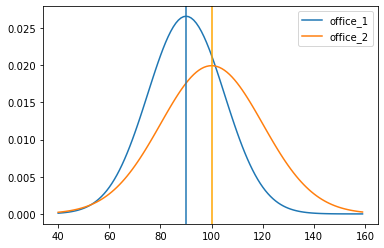

In [74]:
x= np.arange(40,160)

#y=stats.norm(mean, stddev).pdf(x)

y1 = stats.norm(90,15).pdf(x) #this gives graph for office 1
y2 = stats.norm(100,20).pdf(x) #this gives graph for office 2

plt.plot(x, y1, label='office_1')
plt.plot(x,y2, label = 'office_2')
plt.axvline(90)
plt.axvline(100, color='orange')

plt.legend()

In [67]:
avg_y1 = np.mean(y1)
avg_y1

0.008330155453183524

In [68]:
avg_y2= np.mean(y2)
avg_y2

0.008310788879259125

#### Step 2: Set Hypothesis

- $H_0$: There is no diffence in mean selling time between the two offices
- $H_a$: There is a diffence in mean selling time between the two offices   

#### Step 3: Set Alpha

In [84]:
alpha = .05

#### Step 4: Verify Assumption
- samples are independent = YES, two seperate data sets
- normal distribution = YES, sample sizes are 50 and 40
- equal variance = False

In [46]:
y1.var(), y2.var()
#this shows the variance is not the same. must set variance to false

(3.4209403914107914e-05, 1.0818496127286657e-05)

#### Step 5: Compute Test Statistics

In [ ]:
# 2 sample. 2 tailed

In [120]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100,20, 50, equal_var=False)
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [63]:
p < alpha

True

#### Step 6: Decide

In [122]:
print('''
because the p-value is less than alpha value, we reject null hypthosis''')


because the p-value is less than alpha value, we reject null hypthosis


we reject our $H_0$, there is a difference in average selling time between the two offices.

______________________________________________________

#### 2) Load the mpg dataset 

In [78]:
mpg = data('mpg')

In [80]:
mpg.head()
#get a sneakpeek

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [81]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two years (distinct/categorical)


In [82]:
# find average between city and hwy mileage for each year

### harmonic mean:
    - fe_hm= 2/(1/cty +1/hwy)
    - use for mpg, mph in two values
### arithmetic mean: 
    - fe_am = (cty +hwy)/2

In [90]:
mpg['average_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()
#use this code to find the mean of cty and hwy combined and create a 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [123]:
# this will be:
# a 2 sample t-test- comparing two years
# a 2 tailed- wants the difference, not if one is less or more

In [124]:
#create new panda series
ninenine_fuel = mpg[mpg.year == 1999].average_mpg
oeight_fuel = mpg[mpg.year == 2008].average_mpg

#### Step 1: plot distribution

<AxesSubplot:>

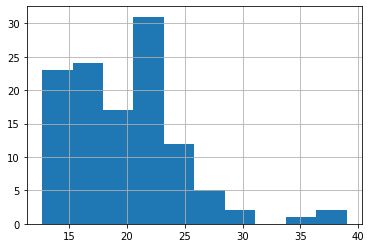

In [96]:
ninenine_fuel.hist()

<AxesSubplot:>

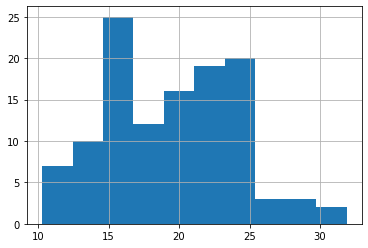

In [97]:
oeight_fuel.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

#### Step 3: Set Alpha

In [94]:
alpha = .05

#### Step 4: Verify Assumption

- samples are independent = YES, two seperate data sets
- normal distribution = Not normal BUT there are more than 30 sample size
- equal variance = False

In [125]:
# to find sample size- must more than 30 to meet assumption
ninenine_fuel.count(), oeight_fuel.count()

(117, 117)

In [95]:
#to find variance
ninenine_fuel.var(), oeight_fuel.var()

(25.850396545865912, 22.550836772260343)

#### Step 5: Compute Test Statistics

In [103]:
t, p = stats.ttest_ind(oeight_fuel, ninenine_fuel, equal_var=False)

In [104]:
t,p,alpha

(-0.3011962975077886, 0.7635358418225436, 0.05)

In [100]:
p < alpha

False

#### Step 6: Decide

- Because p > α, we fail to reject our $H_0$. There is no difference in fuel-economy between 1999 and 2008 vehicles

In [136]:
## just look at the means to visually confirm your decision
ninenine_fuel.mean(), oeight_fuel.mean()

(19.68238764869729, 19.488662986569054)

___________________________________________________________

### b. Are compact cars more fuel-efficient than the average car?

##### first, see what kinds of data you're comparing. 
- average mileage (numeric/continious) vs two car types (distinct/categorical)

In [108]:
fuel_compact = mpg[mpg['class'] == 'compact'].average_mpg
μ = mpg.average_mpg.mean()
#create new panda series with column of compact car average mpg

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- one tailed or 2 tailed?

In [ ]:
#this is:
# one sample- only looking at compact cars average
# one tailed- MORE fuel efficient, not is there a difference in fuel

#### Step 1: plot distribution

<AxesSubplot:>

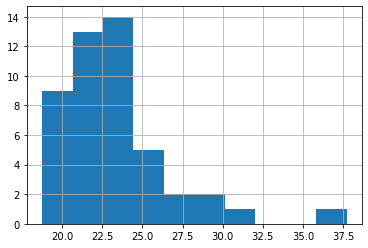

In [111]:
fuel_compact.hist()

In [138]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

#### Step 2: Set Hypothesis
- $H_0$: there is no between compact car fuel-efficiency and the average fuel efficiency
- $H_a$: there is a between compact car fuel-efficiency and the average fuel efficiency

#### Step 3: Set alpha

In [114]:
alpha = .05

#### Step 4: Verify Assumptions
- normal distribution = YES


In [130]:
fuel_compact.count()
#must be more than 30

47

#### Step 5: Compute Test Statistics

In [140]:
t, p = stats.ttest_1samp(fuel_compact, μ)
t,p

(7.512360093161354, 1.5617666348807727e-09)

#### Step 6: Decide

In [141]:
p/2 < alpha

True

Because p/2 < α, we accept our $H_0$. Compact cars are more fuel efficient

________________________________________________________

### c. Do manual cars get better gas mileage than automatic cars?

##### first, see what kinds of data you're comparing. 
- fuel economy (numeric/continious) vs car type (distinct/categorical)

##### second, decide what you'll be using
- One sample t-test or 2 sample t-test?
- on tailed or 2 tailed?

In [153]:
# this will be:
#     1 tail- wants to know if gas mileage is better
#     2 sample t-test

In [134]:
#create two new datasets 
fuel_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fuel_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

#### Step 1: plot distribution

<AxesSubplot:>

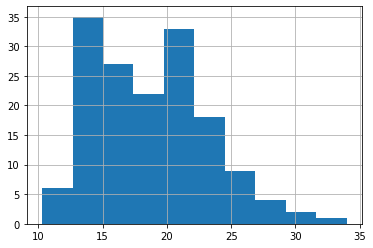

In [142]:
fuel_auto.hist()

<AxesSubplot:>

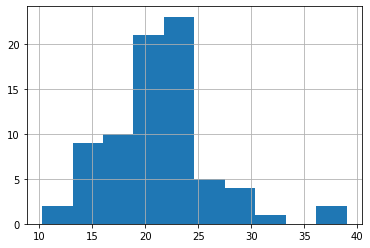

In [145]:
fuel_manual.hist()

#### Step 2: Set Hypothesis

- $H_0$: there is no between automatic and manual fuel efficiency
- $H_a$: there is a between automatic and manual fuel efficiency

#### Step 3: Set alpha

In [155]:
alpha = .05

#### Step 4: Verify Assumptions

- samples are independent = YES, two seperate data sets
- normal distribution = Yes and sample size greater than 30
- equal variance = False

In [158]:
fuel_auto.count(), fuel_manual.count()
#check sample size, must be more than 30

(157, 77)

In [157]:
fuel_auto.var(), fuel_manual.var()
#check variance

(20.428279095002054, 25.665633639828275)

#### Step 5: Compute Statistical Test

In [160]:
t, p = stats.ttest_ind(fuel_manual, fuel_auto, equal_var = False)
#because it is a 2 sample test, must use ttest_ind
t,p, alpha

(4.47444321386703, 1.598070270207952e-05, 0.05)

#### Step 6: Decide

In [159]:
p/2 < alpha
#because it is a one-tailed test, must divide p by 2

True

Because p/2 < alpha, we reject the null hypthosis that there is no difference in gas milage between manual and auto cars

In [161]:
## just look at the means to visually confirm your decision
fuel_manual.mean(), fuel_auto.mean()

(21.629228592155194, 18.583199507835747)

#### ^-- 21.69 is not the same as 18.58 SO... the null that there is NO difference in fuel economy is rejected